### Block  3 – “Can continuous scores support ACMG evidence categories?”

__(i)__ apply the four Pejaver thresholds to the calibrated scores to produce evidence tiers (Very‑Strong → Supporting).

__(ii)__ for each tier, report PPV/NPV and the % of variants that receive a decisive label vs. remain indeterminate; contrast this coverage with the decisive binary tools.

*Take‑home: continuous predictors are promising for strong evidence on a subset, but still leave many variants unclassified.*

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv("ClinHum_ALL_preds_cleaned.csv")

/var/folders/cc/jxs8yxmn00bb_43d9z_0f13c0000gn/T/ipykernel_19225/2621606095.py:1: DtypeWarning: Columns (12,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ClinHum_ALL_preds_cleaned.csv")


In [4]:
cal_probs = pd.read_csv('calibrated_probs.csv')

In [5]:
# Pejaver evidence ranges (lo, hi, label)
bounds = {
    'CADD': [
        (-np.inf,  0.15,   'BP4_STR'),
        ( 0.15,   17.3,    'BP4_MOD'),
        (17.3,    22.7,    'BP4_SUP'),
        (25.3,    28.1,    'PP3_SUP'),
        (28.1,   np.inf,   'PP3_MOD')
    ],
    'MetaRNN': [
        (-np.inf, 0.025,   'BP4_VS'),
        (0.025,   0.026,   'BP4_STR'),
        (0.026,   0.100,   'BP4_MOD'),
        (0.100,   0.248,   'BP4_SUP'),
        (0.661,   0.816,   'PP3_SUP'),
        (0.816,   np.inf,  'PP3_MOD')
    ],
    'Envision': [
    (-0.772,  -0.673,  'PP3_SUP'),
    (-0.673,  np.inf,  'PP3_MOD')
    ],
    'QAFI': [
        (-np.inf, -1.177,  'BP4_MOD'),
        (-1.177,  -0.946,  'BP4_SUP'),
        (-0.700,  -0.636,  'PP3_SUP'),
        (-0.636,  np.inf,  'PP3_MOD')
    ],
    'EVE': [
        (-np.inf, 0.097,   'BP4_MOD'),
        (0.097,   0.194,   'BP4_SUP'),
        (0.695,   0.861,   'PP3_SUP'),
        (0.861,   np.inf,  'PP3_MOD')
    ],
    'AlphaMissense': [
        (-np.inf, 0.090,   'BP4_MOD'),
        (0.090,   0.146,   'BP4_SUP'),
        (0.755,   0.887,   'PP3_SUP'),
        (0.887,   np.inf,  'PP3_MOD')
    ],
    'BayesDel': [
        (-np.inf, -0.36,  'BP4_MOD'),
        (-0.36,   -0.18,  'BP4_SUP'),
        ( 0.13,    0.27,  'PP3_SUP'),
        ( 0.27,    0.50,  'PP3_MOD'),
        ( 0.50,   np.inf, 'PP3_STR')
    ],
    'REVEL': [
        (-np.inf, 0.003,   'BP4_VS'),
        (0.003,   0.016,   'BP4_STR'),
        (0.016,   0.183,   'BP4_MOD'),
        (0.183,   0.290,   'BP4_SUP'),
        (0.644,   0.773,   'PP3_SUP'),
        (0.773,   0.932,   'PP3_MOD'),
        (0.932,  np.inf,   'PP3_STR')
    ],
    'VEST4': [
        (-np.inf, 0.302,   'BP4_MOD'),
        (0.302,   0.449,   'BP4_SUP'),
        (0.764,   0.861,   'PP3_SUP'),
        (0.861,   0.965,   'PP3_MOD'),
        (0.965,  np.inf,   'PP3_STR')
    ]
}

In [6]:
# Helper to map one numeric score to a Pejaver bin
def pej_category(x, rule_list):
    if pd.isna(x):  # missing score → no evidence
        return 'Indeterminate'
    for lo, hi, lab in rule_list:
        if lo <= x < hi:
            return lab
    return 'Indeterminate'

In [7]:
# Assign categories for each predictor
for score_col, rule in bounds.items():
    # make sure the score column is numeric
    df[score_col] = pd.to_numeric(df[score_col], errors='coerce')
    df[f'{score_col}_cat'] = df[score_col].apply(pej_category, args=(rule,))

In [8]:
df.columns

Index(['GeneSymbol', 'ClinSigSimple', 'variant', 'uniprot', 'SIFT_label',
       'SIFT_score', 'PolyPhen_label', 'PolyPhen_score', 'BayesDel (binary)',
       'BayesDel', 'CADD', 'CADD (RAW)', 'ClinPred_score', 'VEST4',
       'EVE (binary)', 'EVE', 'REVEL', 'PrimateAI_score',
       'AlphaMissense (binary)', 'AlphaMissense', 'Envision', 'QAFI',
       'MetaRNN', 'MetaRNN (binary)', 'CADD_cat', 'MetaRNN_cat',
       'Envision_cat', 'QAFI_cat', 'EVE_cat', 'AlphaMissense_cat',
       'BayesDel_cat', 'REVEL_cat', 'VEST4_cat'],
      dtype='object')

In [9]:
df.isna().sum()

GeneSymbol                    0
ClinSigSimple                 0
variant                       0
uniprot                       0
SIFT_label                 1099
SIFT_score                 1099
PolyPhen_label             6891
PolyPhen_score             3330
BayesDel (binary)            69
BayesDel                     69
CADD                          0
CADD (RAW)                    0
ClinPred_score              141
VEST4                      1108
EVE (binary)              22860
EVE                       16735
REVEL                      3975
PrimateAI_score             510
AlphaMissense (binary)     6958
AlphaMissense              3202
Envision                   3583
QAFI                       4687
MetaRNN                   37396
MetaRNN (binary)          37396
CADD_cat                      0
MetaRNN_cat                   0
Envision_cat                  0
QAFI_cat                      0
EVE_cat                       0
AlphaMissense_cat             0
BayesDel_cat                  0
REVEL_ca

In [10]:
# Category-level precision (PPV for PP3 bins, NPV for BP4 bins)
y = df['ClinSigSimple'].values   # 1 = Pathogenic
records = []

for score_col, rule in bounds.items():
    cat_col = f'{score_col}_cat'
    for lab in df[cat_col].unique():
        if lab == 'Indeterminate': 
            continue
        m = df[cat_col] == lab
        n = m.sum()
        if n == 0: 
            continue
        pos = y[m].mean()
        precision = pos if lab.startswith('PP3') else 1 - pos
        records.append((score_col, lab, n, precision))

cat_df = (pd.DataFrame(records, columns=['Predictor','Category','N','Precision']))

In [11]:
cat_df

,Predictor,Category,N,Precision
0,CADD,BP4_SUP,9884,0.910967
1,CADD,PP3_MOD,8306,0.801108
2,CADD,PP3_SUP,7091,0.584121
3,CADD,BP4_MOD,10927,0.972820
4,CADD,BP4_STR,1459,0.988348
5,MetaRNN,PP3_MOD,2776,0.907781
6,MetaRNN,BP4_MOD,1541,0.975341
7,MetaRNN,BP4_SUP,1046,0.963671
8,MetaRNN,BP4_VS,2638,0.987491
9,MetaRNN,PP3_SUP,523,0.418738


n = number of variants assigned to a given evidence category (e.g. “PP3_SUP”) for a predictor.

precision = category-level accuracy:

- If PP3 (pathogenic bin): precision = PPV = proportion of true pathogenic variants.

- If BP4 (benign bin): precision = NPV = proportion of true benign variants = 1 − pos.

In [12]:
cat_df.to_latex("cat_precision_table_Block3.tex", index=False)

In [13]:
# Coverage (% variants that receive any evidence label)
coverage = []
for score_col in bounds:
    decided = df[f'{score_col}_cat'] != 'Indeterminate'
    coverage.append((score_col, decided.mean()*100))
coverage_df = pd.DataFrame(coverage, columns=['Predictor','%_classified'])

In [14]:
coverage_df   # how many variants each predictor successfully classifies (non-Indeterminate

,Predictor,%_classified
0,CADD,79.860493
1,MetaRNN,18.165628
2,Envision,12.063775
3,QAFI,55.395836
4,EVE,36.867659
5,AlphaMissense,63.361320
6,BayesDel,73.665352
7,REVEL,68.538778
8,VEST4,77.318407


In [15]:
coverage_df.to_latex("cat_coverage_table_Block3.tex", index=False)

Coverage < 100% is expected because any score that falls between the BP4- and PP3-supporting bands is tagged Indeterminate.

- Because QAFI’s middle gap is smaller, only ≈ 10% of variants fall into it → 90% coverage.

- REVEL leaves a much wider undecided zone (0.29–0.644), so only about 69% of variants receive an evidence label. The other tools have intermediate gap sizes and hence intermediate coverage.

Thus, even the best calibrated continuous score (QAFI) still leaves one variant in ten without an ACMG evidence tag, while the binary tools classify roughly three-quarters.

PPV / NPV heatmap

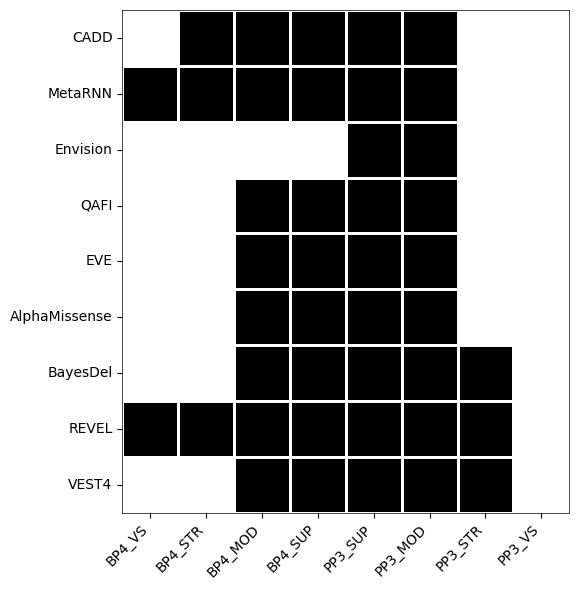

In [16]:
order = ['BP4_VS', 'BP4_STR', 'BP4_MOD', 'BP4_SUP', 'PP3_SUP', 'PP3_MOD', 'PP3_STR', 'PP3_VS']
predictors = ['CADD', 'MetaRNN', 'Envision', 'QAFI', 'EVE', 'AlphaMissense', 'BayesDel', 'REVEL', 'VEST4']

binary_matrix = [
    [0, 1, 1, 1, 1, 1, 0, 0],  # CADD
    [1, 1, 1, 1, 1, 1, 0, 0],  # MetaRNN
    [0, 0, 0, 0, 1, 1, 0, 0],  # Envision
    [0, 0, 1, 1, 1, 1, 0, 0],  # QAFI
    [0, 0, 1, 1, 1, 1, 0, 0],  # EVE
    [0, 0, 1, 1, 1, 1, 0, 0],  # AlphaMissense
    [0, 0, 1, 1, 1, 1, 1, 0],  # BayesDel
    [1, 1, 1, 1, 1, 1, 1, 0],  # REVEL
    [0, 0, 1, 1, 1, 1, 1, 0],  # VEST4
]

heatmap_df = pd.DataFrame(binary_matrix, index=predictors, columns=order)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(
    heatmap_df, cmap='Greys', cbar=False, linewidths=1, linecolor='white',
    xticklabels=True, yticklabels=True, square=True, ax=ax
)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)
    spine.set_color("black")

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("heatmap_cat_Block3.svg", format="svg")
plt.tight_layout()
plt.show()

First, we turn each predictor’s probability (for example, 0.8) into odds (0.8 / 0.2 = 4 to 1). Then, using the ACMG rules—which say, for instance, that odds ≥18.7 correspond to “strong” evidence, and odds ≥4.3 to “moderate”—we find the probability cut-off (e.g. ≈0.82 for “strong”) that matches each evidence level.

Odds are defined as the ratio of the probability of an event to the probability of its complement. If p = 0.8, then 1 – p = 0.2, and odds = p/(1–p) = 0.8/0.2 = 4, which is expressed as “4 to 1”. This conversion lets us map probabilities onto the ACMG’s odds‐based evidence thresholds.